## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

### Realizado por:

Aluno: Felipe Carneiro Machado

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss

df = pd.read_csv('sneeze2.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,78,0,0,0,32.0,81.085959
1,8,0,0,0,41.0,53.888183
2,34,0,0,1,39.0,92.455084
3,7,0,0,0,56.0,41.246594
4,8,0,0,0,36.0,91.036921
...,...,...,...,...,...,...
1395,10,1,0,0,53.0,57.794915
1396,11,1,0,0,58.0,59.585500
1397,9,0,0,0,36.0,29.955485
1398,18,1,1,0,47.0,63.221483


In [106]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


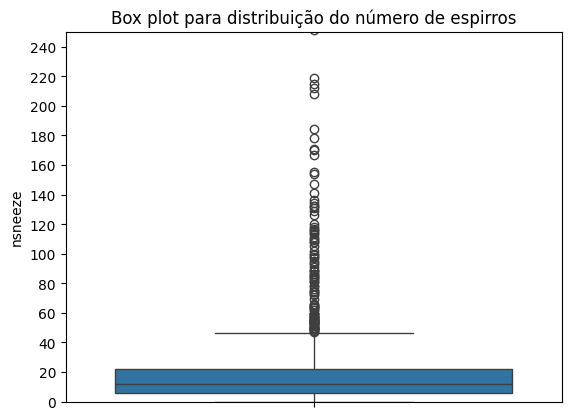

In [ ]:
ax = sns.boxplot(df, y = "nsneeze")
ax.set_title("Box plot para distribuição do número de espirros")
ax.set(ylim=(0, 250))
t = ax.set_yticks(np.arange(0, 250, 20))


Percebe-se que a mais da metade dos pacientes se concentra na faixa de até 20 espirros em um dia (a visualização foi limitada pois outliers achataram demais o boxplot).

[(0.0, 100.0)]

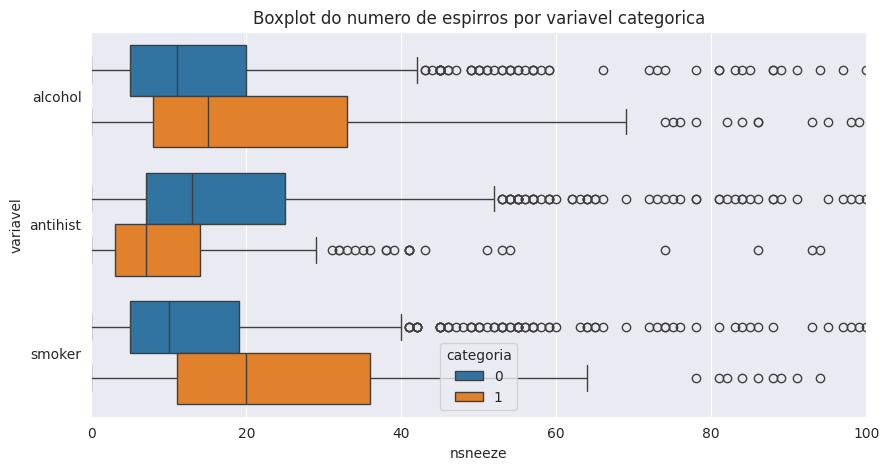

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

cat_cols = ['alcohol', 'antihist', 'smoker']

tidy = (df.melt(id_vars="nsneeze",
                value_vars=cat_cols,
                var_name='variavel',
                value_name='categoria')
          .sort_values(['variavel', 'categoria']))

sns.boxplot(tidy, x="nsneeze", y="variavel", hue="categoria", ax=ax)
ax.set_title("Boxplot do numero de espirros por variavel categorica")
ax.set(xlim=(0, 100))

Apesar de alguns valores altos de nsneeze, nota-se que existe uma tendência de fumantes e consumidores de álcool a terem um maior número de espirro, e o uso de antihistamínicos tem efeito contrário.

[(0.0, 60.0)]

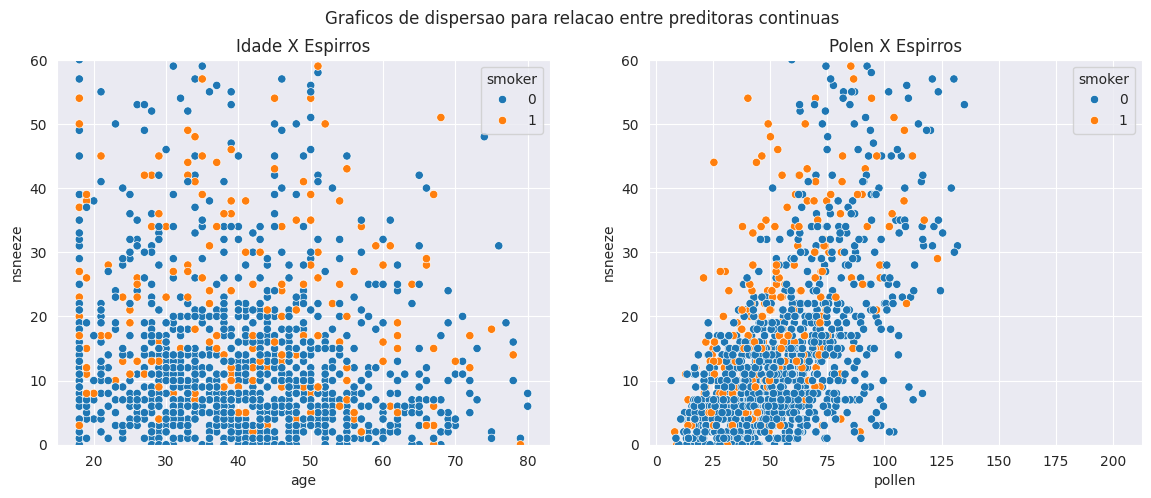

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Graficos de dispersao para relacao entre preditoras continuas")

sns.scatterplot(df, x="age", y="nsneeze", ax=ax[0], hue="smoker")
ax[0].set_title("Idade X Espirros")
ax[0].set(ylim=(0, 60))

sns.scatterplot(df, x="pollen", y="nsneeze", ax=ax[1], hue="smoker")
ax[1].set_title("Polen X Espirros")
ax[1].set(ylim=(0, 60))

É perceptível que há uma relação possivelmente linear entre a concentração de pólen e a quantidade de espirros. Para o caso da idade, não é possível identificar uma relação clara, apesar de aparentar haver um certo decrescimento no número de espirros para maiores de 60 anos. Note que os gráficos foram limitados a 60 espirros para permitir melhor visualização.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [3]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [2]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8511.6
Date:                Fri, 28 Nov 2025   Deviance:                       11077.
Time:                        13:31:32   Pearson chi2:                 1.15e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5028      0.021  

**Interpretação dos parâmetros do modelo de Poisson**

Todos os parâmetros do modelo obtiveram significância estatística sob $alpha =5%$.

Com a função de ligação Log, a média (ou taxa) para uma determinada combinação de preditores é dada por

$$
\mu_i=e^{\eta_i} = e^{\beta_0+\beta_1 x_1+...+\beta_p x_p}
$$

Assim, cada parâmetro do modelo pode ser interpretado como a **razão de taxas** entre duas observações que diferem apenas por uma unidade na variável relacionada ao parâmetro.

$$
\frac{\mu_j}{\mu_i}=\frac{e^{\beta_0 x_0+...+1.\beta_k+...+\beta_p x_p}}{e^{\beta_0 x_0...+0.\beta_k+...+\beta_p x_p}} = e^{\beta_k}
$$

Para variáveis avaliadas em escala contínua:

$$
\frac{\mu_j}{\mu_i}=\frac{e^{\beta_0 x_0+...+a.\beta_k +...+\beta_p x_p}}{e^{\beta_0 x_0...+b.\beta_k +...+\beta_p x_p}} = e^{\beta_k(a-b)}
$$


In [58]:
exp_params = np.exp(ajuste_pois.params)
print(f"Taxa basal = {exp_params.loc["Intercept"]:.2f}")
print(f"Razao de taxas para consumo de alcool = {exp_params.loc["C(alcohol)[T.1]"]:.2f}")
print(f"Razao de taxas para uso de antihistaminicos = {exp_params.loc["C(antihist)[T.1]"]:.2f}")
print(f"Razao de taxas para uso de cigarro = {exp_params.loc["C(smoker)[T.1]"]:.2f}")
print(f"Razao de taxas para idade com 10 anos de diferencas = {np.pow(exp_params.loc["age"], 10):.2f}")
print(f"Razao de taxas para concentracao de polen com 10 pontos de diferenca = {np.pow(exp_params.loc["pollen"], 10):.2f}")

Taxa basal = 4.49
Razao de taxas para consumo de alcool = 1.38
Razao de taxas para uso de antihistaminicos = 0.56
Razao de taxas para uso de cigarro = 1.98
Razao de taxas para idade com 10 anos de diferencas = 0.89
Razao de taxas para concentracao de polen com 10 pontos de diferenca = 1.30


Nota-se que o tabagismo leva uma taxa em média 2 vezes maior, e o uso de antihistamínicos a uma 2 vezes menor, sendo as 2 variáveis categoricas mais influentes. A idade tem um efeito negativo pequeno, enquanto a concentração de pólen possui um grande efeito positivo.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [60]:
# Analise de desvio comparada com chisq n-p
deviance = ajuste_pois.deviance
p = 1 - ss.chi2(df=ajuste_pois.df_resid).cdf(deviance)
print(f"Desvio = {deviance:.2f} Df = {ajuste_pois.df_resid} p valor para chisq = {p}")

Desvio = 11077.48 Df = 1394 p valor para chisq = 0.0


Deviance muito maior que os graus de liberdade, indica mau ajuste do modelo.

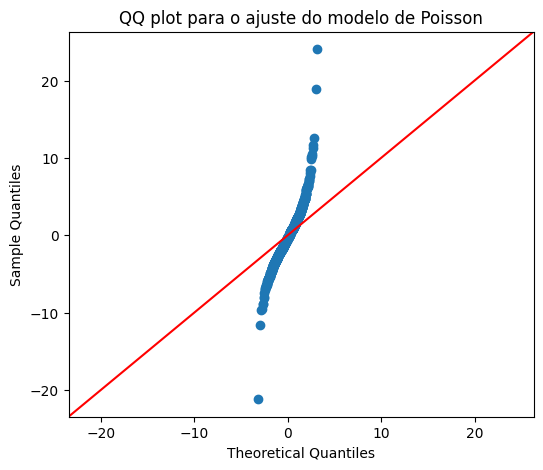

In [19]:
# QQ plot
from statsmodels.graphics.gofplots import ProbPlot

pplot = ProbPlot(ajuste_pois.resid_deviance)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
line = np.arange(-3, 3, 0.1)
# plt.plot(line, line)
ax.set_title("QQ plot para o ajuste do modelo de Poisson")
fig = pplot.qqplot(line="45", ax=ax)


A sobredispersão é notável pelo QQ-Plot, os quantis ajustados se afastam radicalmente dos quantis teóricos.

[(0.0, 50.0),
 (0.0, 50.0),
 Text(0.5, 0, 'Valor real'),
 Text(0, 0.5, 'Valor ajustado'),
 Text(0.5, 1.0, 'Real X Ajustado')]

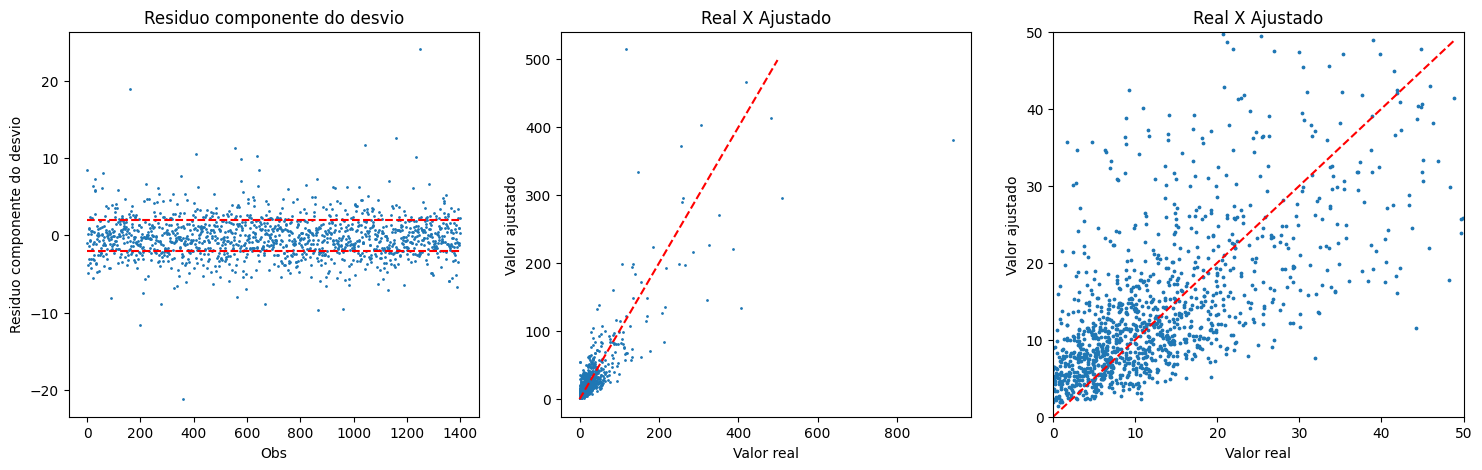

In [44]:
fig, axes =plt.subplots(1, 3, figsize=(18, 5))

resid_dev = ajuste_pois.resid_deviance
fitted = ajuste_pois.fittedvalues
resid = fitted - df["nsneeze"]

# Grafico de residuos
axes[0].scatter(list(range(len(resid_dev))), resid_dev, s=1)
axes[0].hlines(y=(-2, 2), xmin=0, xmax=len(resid_dev), linestyle="dashed", color="red")
axes[0].set(xlabel="Obs", ylabel="Residuo componente do desvio", title="Residuo componente do desvio")

# Grafico de Real X Ajustado
axes[1].scatter(df["nsneeze"], fitted, s=1)
line = np.arange(0, 500, 1)
axes[1].plot(line, linestyle="dashed", color="red")
axes[1].set(xlabel="Valor real", ylabel="Valor ajustado", title="Real X Ajustado")

# Grafico de Real X Ajustado com "zoom"
jitter = lambda x:x+ss.norm.rvs(0, 0.35) # Jitter para facilitar visualizacao
axes[2].scatter(df["nsneeze"].apply(jitter), fitted, s=3)
line = np.arange(0, 50, 1)
axes[2].plot(line, linestyle="dashed", color="red")
axes[2].set(xlim=(0, 50), ylim=(0, 50), xlabel="Valor real", ylabel="Valor ajustado", title="Real X Ajustado")





Percebe-se uma quantidade alta de pontos com resíduo acima de 2 desvios padrão, e uma grande dispersão ao redor da reta 45 graus nos plots de real vs ajustado. 

In [50]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    
    
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

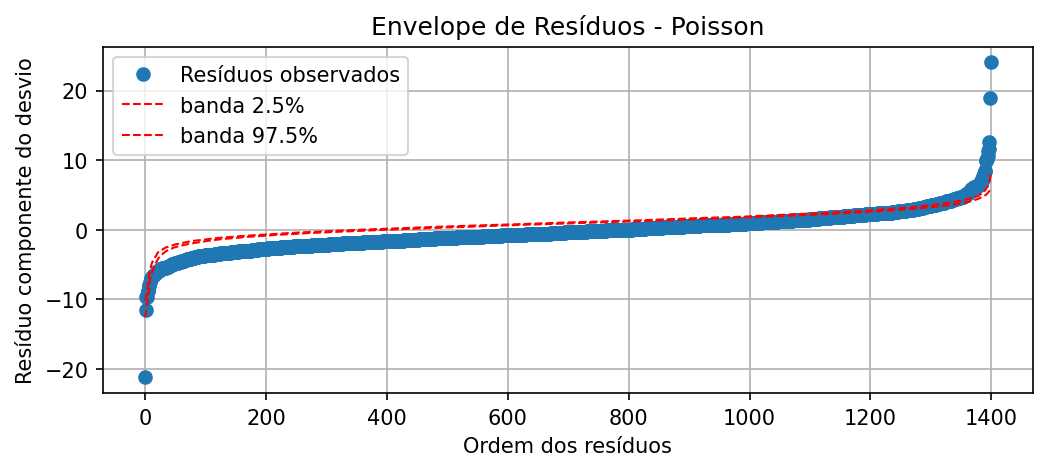

In [51]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**Análise da sobredispersão**

Todos os gráficos e cálculos desenvolvidos acima indicam que o ajuste com o modelo de poisson apresenta sobredispersão
- No QQ-Plot, é visível que as caudas são muito mais pesadas que a distribuição normal
- Análise de desvio indica mau ajuste do modelo
- Gráfico de resíduos indica que há uma grande quantidade de resíduos acima de 2 desvios padrão
- Gráfico de envelope mostra que a maioria dos pontos se situa fora do envelope

Assim, é seguro afirmar que o modelo sofre de sobredispersão, justificando ajustar uma modelo Binomial Negativo

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.3

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4894.5
Date:                Fri, 28 Nov 2025   Deviance:                       1569.9
Time:                        15:07:52   Pearson chi2:                 1.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5238      0.064  

In [54]:
print("Comparacao entre modelos")
print(pd.DataFrame({
    "Poisson" : [ajuste_pois.aic, ajuste_pois.bic, ajuste_pois.deviance],
    "Binomial Negativa" : [ajuste_nb.aic, ajuste_nb.bic, ajuste_nb.deviance]
}, index=["AIC", "BIC", "Desvio"]))

COmparacao entre modelos
             Poisson  Binomial Negativa
AIC     17035.126988        9801.096462
BIC       979.022923       -8528.518163
Desvio  11077.476080        1569.934993


/home/felipe/Documents/Usp/2025_2/reg2/Avaliacao2/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Através destas métricas, nota-se que o modelo Binomial Negativo tem valores menores (mais adequados) para AIC, BIC e Desvio, indicando um ajuste de melhor qualidade.

In [58]:
# Analise de desvio comparada com chisq n-p
deviance = ajuste_nb.deviance
p = 1 - ss.chi2(df=ajuste_nb.df_resid).cdf(deviance)
print(f"Desvio = {deviance:.2f} Df = {ajuste_nb.df_resid} p valor para chisq = {p}")

Desvio = 1569.93 Df = 1394 p valor para chisq = 0.0006549036170323541


Desvio maior que os graus de liberdade, porém muito mais próximo que o modelo de Poisson.

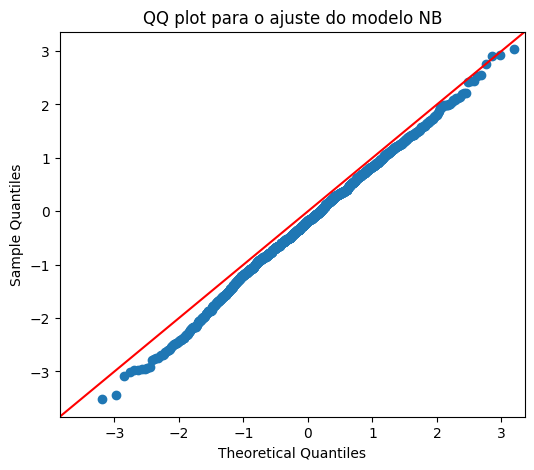

In [62]:
# QQ plot
from statsmodels.graphics.gofplots import ProbPlot

pplot = ProbPlot(ajuste_nb.resid_deviance)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
line = np.arange(-3, 3, 0.1)
# plt.plot(line, line)
ax.set_title("QQ plot para o ajuste do modelo NB")
fig = pplot.qqplot(line="45", ax=ax)


Quantis dos reśiduos próximos aos quantis teóricos

[(0.0, 50.0),
 (0.0, 50.0),
 Text(0.5, 0, 'Valor real'),
 Text(0, 0.5, 'Valor ajustado'),
 Text(0.5, 1.0, 'Real X Ajustado')]

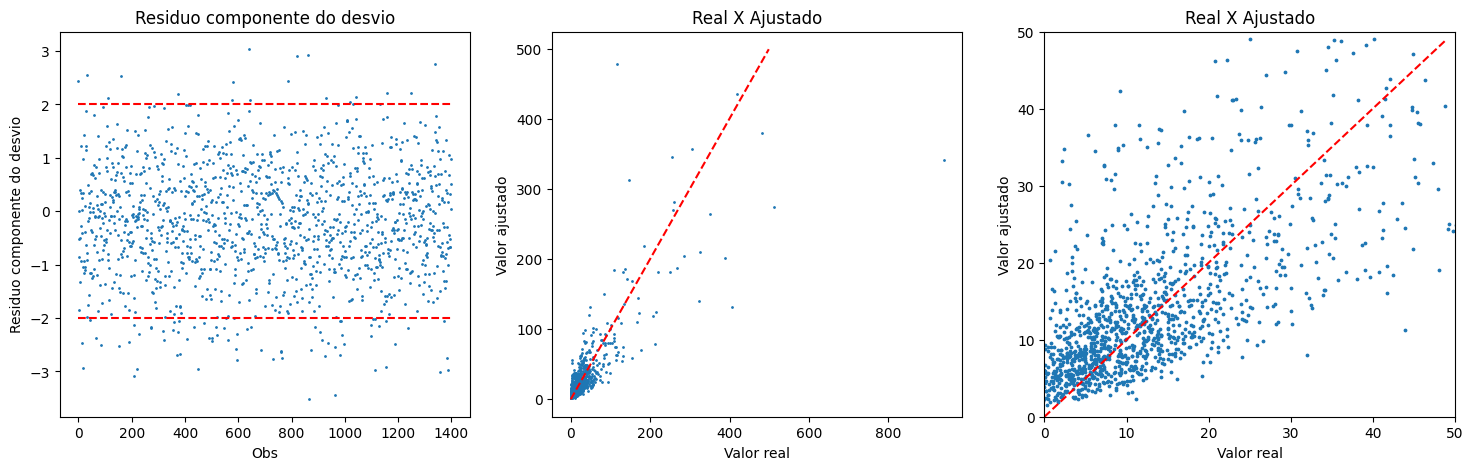

In [63]:
fig, axes =plt.subplots(1, 3, figsize=(18, 5))

resid_dev = ajuste_nb.resid_deviance
fitted = ajuste_nb.fittedvalues
resid = fitted - df["nsneeze"]

# Grafico de residuos
axes[0].scatter(list(range(len(resid_dev))), resid_dev, s=1)
axes[0].hlines(y=(-2, 2), xmin=0, xmax=len(resid_dev), linestyle="dashed", color="red")
axes[0].set(xlabel="Obs", ylabel="Residuo componente do desvio", title="Residuo componente do desvio")

# Grafico de Real X Ajustado
axes[1].scatter(df["nsneeze"], fitted, s=1)
line = np.arange(0, 500, 1)
axes[1].plot(line, linestyle="dashed", color="red")
axes[1].set(xlabel="Valor real", ylabel="Valor ajustado", title="Real X Ajustado")

# Grafico de Real X Ajustado com "zoom"
jitter = lambda x:x+ss.norm.rvs(0, 0.35) # Jitter para facilitar visualizacao
axes[2].scatter(df["nsneeze"].apply(jitter), fitted, s=3)
line = np.arange(0, 50, 1)
axes[2].plot(line, linestyle="dashed", color="red")
axes[2].set(xlim=(0, 50), ylim=(0, 50), xlabel="Valor real", ylabel="Valor ajustado", title="Real X Ajustado")




Notam-se menos pontos de alto resíduo



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [68]:
# Sera escolhido o modelo NB pelas razoes discutidas anteriormente
# Calculo do efeito marginal com o get_margeff no statsmodels
alcohol_ame = ajuste_nb.get_margeff(at="overall")
alcohol_ame.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
         GLM Marginal Effects        
=====================================
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
====================================================================================
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      8.0475      0.896      8.983      0.000       6.292       9.803
C(antihist)[T.1]   -13.9729      1.097    -12.741      0.000     -16.122     -11.823
C(smoker)[T.1]      14.4138      1.055     13.664      0.000      12.346      16.481
age                 -0.2572      0.030     -8.711      0.000      -0.315      -0.199
pollen               0.5817      0.025     23.363      0.000       0.533       0.631
====================================================================================
"""

Com base na tabela, temos que:
- O efeito médio marginal do consumo de álcool é 8.05, indicando que, em média, o consumo de álcool leva o 8 espirros a mais por dia, comparado a dias sem o consumo
- O efeito médio marginal do uso de anti histamínico é -13.97, indicando que, em média, o uso de anti histamínico leva o 14 espirros a menos por dia, comparado a dias sem o uso.

In [69]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


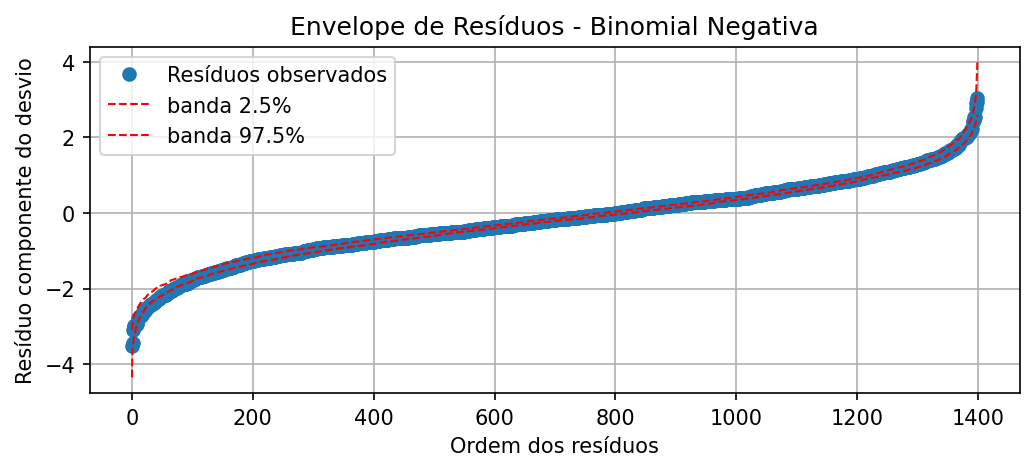

In [70]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

Os resíduos do modelo Binomial Negativo também estão quase todos dentro do envelope, novamente confirmado o bom ajuste deste.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

train, test = train_test_split(df, train_size=0.8)

pois_ml = smf.glm(
    formula= "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen",
    data = train,
    family=sm.families.Poisson()
)

poisml_fit = pois_ml.fit()

nb_ml = smf.glm(
    formula= "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen",
    data = train,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

nbml_fit = nb_ml.fit()

def mse(model):
    return mean_squared_error(test["nsneeze"], model.predict(test))

def mae(model):
    return mean_absolute_error(test["nsneeze"], model.predict(test))

def rmse(model):
    return root_mean_squared_error(test["nsneeze"], model.predict(test))

print("Comparacao de poder preditivo entre modelos")
pd.DataFrame({
    "Poisson" : [mse(poisml_fit), rmse(poisml_fit), mae(poisml_fit)],
    "Binomial Negativa" : [mse(nbml_fit), rmse(nbml_fit), mae(nbml_fit)]
}, index=["MSE", "RMSE", "MAE"])

Comparacao de poder preditivo entre modelos


,Poisson,Binomial Negativa
MSE,1055.390800,791.921446
RMSE,32.486779,28.141099
MAE,11.737478,11.127886


É perceptível que as métricas de erro foram menores para o modelo Binomial Negativo, por mais que a diferença seja pequena, assim, a vanatagem em métricas inferenciais também converteu-se em vantagem nas métricas preditivas.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [72]:
# Para verificar oq eh alta e baixa concentracao de pollen
df["pollen"].describe()

count    1400.000000
mean       58.687196
std        29.748564
min         6.576282
25%        37.643987
50%        53.852482
75%        73.818962
max       202.922690
Name: pollen, dtype: float64

In [74]:
indvs = pd.DataFrame({
    "alcohol" : [0, 1],
    "antihist" : [1, 0],
    "smoker" : [0, 1],
    "age" : [30, 50],
    "pollen" : [30, 80] # Um pouco alem dos quartis 1 e 3
}, index=["Individuo A", "Individuo B"])
nbml_fit.predict(indvs)

Individuo A     3.785878
Individuo B    51.871961
dtype: float64